<h1 style='color:#0000ec'>7 &nbsp; O método de Runge-Kutta de 4º ordem</h1>

&nbsp; Importando as bibliotecas NumPy e Matplotlib ao arquivo <b>atual</b>:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Escrevendo arquivo contendo a função <i><b>sol_rk4(	&lt;tempo>,	&lt;população inicial>,	&lt;modelo>)</b></i> para receber diferentes modelos:

In [2]:
%%writefile ../python/sol_rk4.py

import numpy as np #Biblioteca

def sol_rk4(vt,P0,modelo): #Função RK4
    
    P = np.array([P0]) #Vetor população
    
    h = vt[2] - vt[1] #Passo de integração

    for t in vt: #Aproximando T(i) pelo método de Euler modificado
        
        k1 = modelo(P[-1])
        k2 = modelo(P[-1]+(h/2)*k1)
        k3 = modelo(P[-1]+(h/2)*k2)
        k4 = modelo(P[-1]+h*k3)
        K = (1/6)*(k1+2*(k2+k3)+k4)
        Pi = P[-1]+h*K
        P = np.append(P,Pi)
        
    return P[0:P.shape[0]-1]

Overwriting ../python/sol_rk4.py


&nbsp; Carregando o diretório <b>python/</b> que contém as funções escritas ao longo dos tópicos:

In [3]:
import sys
sys.path.insert(0, '../python')

Importando a função <b>sol_rk4</b> escrita em <b>[2]</b> e os modelos populacionais:

In [4]:
from sol_rk4 import sol_rk4
from f_malthus import f_malthus
from f_verhulst import f_verhulst
from f_montroll import f_montroll

&nbsp; Uma vez definido o método de Euler modificado, basta declarar o passo de derivação <b>h</b>, a condição inicial <b>P0</b>, o tempo inicial <b>ti</b>, o tempo final <b>tf</b> e o intervalo de tempo <b>vt</b>:

In [5]:
h = 0.001 #Passo de derivação

P0 = 197228 #Condição inicial

ti = 0 #tempo inicial

tf = 12 #tempo final

vt = np.arange(ti,tf,h) #Intervalo de 10 à 21 anos com passo h

<h2 style='color:#0000b7' >&nbsp; 7.1 &nbsp;Modelo de Malthus</h2>

&nbsp; &nbsp; &nbsp; Atribuindo as variáveis aos parâmetros de <b>sol_rk4</b>:

In [6]:
sol = sol_rk4(vt,P0,f_malthus)
print(sol)
print('O vetor contendo o número de habitantes tem {} elementos'.format(sol.shape[0]))

[197228.         197228.80271959 197229.60544245 ... 207097.19205727
 207098.03494455 207098.87783527]
O vetor contendo o número de habitantes tem 12000 elementos


&nbsp; &nbsp; &nbsp; Exibindo o gráfico <b>vt</b> $\times$ <b>P</b>:

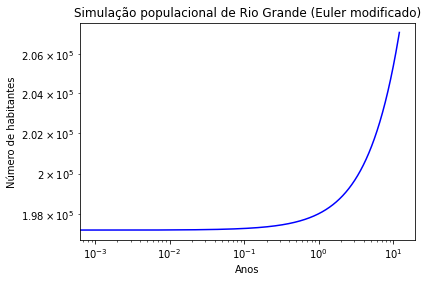

Simulação para 2021: 207098.87783527214
Simulação para 2021 (arredondado): 207099


In [7]:
plt.plot(vt,sol,'b',label='Euler modificado')
plt.title("Simulação populacional de Rio Grande (Euler modificado)")
plt.xlabel("Anos")
plt.ylabel("Número de habitantes")
plt.yscale("log")
plt.xscale("log")
plt.show()

print("Simulação para 2021:",sol[sol.shape[0]-1])
print("Simulação para 2021 (arredondado):",round(sol[sol.shape[0]-1]))

<h2 style='color:#0000b7' >&nbsp; 7.2 &nbsp;Modelo de Verhulst</h2>

&nbsp; &nbsp; &nbsp; Atribuindo as variáveis aos parâmetros de <b>sol_rk4</b>:

In [8]:
sol = sol_rk4(vt,P0,f_verhulst)
print(sol)
print('O vetor contendo o número de habitantes tem {} elementos'.format(sol.shape[0]))

[197228.         197228.83522988 197229.67043105 ... 205386.92228177
 205387.46397744 205388.00565277]
O vetor contendo o número de habitantes tem 12000 elementos


&nbsp; &nbsp; Gerando solução com vetor variando de 0 à 500, com o obejtivo de visualizar a assíntota horizontal em <b>P</b> = <b>L</b>

In [9]:
t_lim = np.linspace(0,500)
sol_lim = sol_rk4(t_lim,P0,f_verhulst)

&nbsp; &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>

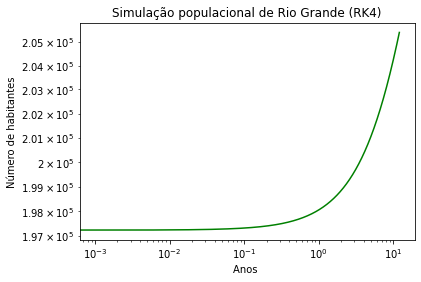

Simulação para 2021: 205388.00565276708
Simulação para 2021 (arredondado): 205388


In [10]:
plt.plot(vt,sol,"g")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande (RK4)")
plt.xlabel("Anos ")
plt.ylabel("Número de habitantes")
plt.yscale("log")
plt.xscale("log")
plt.show()

print("Simulação para 2021:",sol[sol.shape[0]-1])
print("Simulação para 2021 (arredondado):",round(sol[sol.shape[0]-1]))

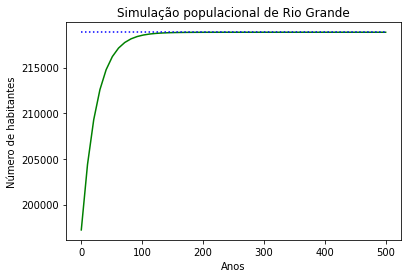

In [11]:
L = 218858 #Limite (L)

plt.plot(t_lim,sol_lim,"g") #Curva logística
plt.plot(t_lim,np.full(t_lim.shape[0], L),"b", linestyle = 'dotted') #Assíntota

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos")
plt.ylabel("Número de habitantes")
plt.show()

<h2 style='color:#0000b7' >&nbsp; 7.3 &nbsp;Modelo de Montroll</h2>

&nbsp; &nbsp; &nbsp; Atribuindo as variáveis aos parâmetros de <b>sol_rk4</b>:

In [12]:
sol = sol_rk4(vt,P0,f_montroll)
print(sol)
print('O vetor contendo o número de habitantes tem {} elementos'.format(sol.shape[0]))

[197228.         197228.80372289 197229.60744906 ... 207105.57952721
 207106.42155103 207107.2635774 ]
O vetor contendo o número de habitantes tem 12000 elementos


&nbsp; &nbsp; Gerando solução com vetor variando de 0 à 500, com o obejtivo de visualizar a assíntota horizontal em <b>P</b> = <b>L</b>

In [13]:
t_lim = np.linspace(0,500)
sol_lim = sol_rk4(t_lim,P0,f_montroll)

 &nbsp; &nbsp; &nbsp; Exibindo gráfico <b>vt</b> $\times$ <b>$P$</b>

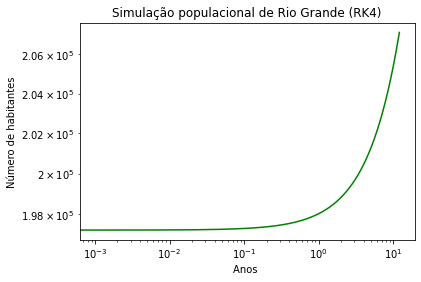

Simulação para 2021: 207107.26357739503
Simulação para 2021 (arredondado): 207107


In [14]:
plt.plot(vt,sol,"g")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande (RK4)")
plt.xlabel("Anos ")
plt.ylabel("Número de habitantes")
plt.yscale("log")
plt.xscale("log")
plt.show()

print("Simulação para 2021:",sol[sol.shape[0]-1])
print("Simulação para 2021 (arredondado):",round(sol[sol.shape[0]-1]))